In [8]:
import pandas as pd
import matplotlib.pyplot as plt


def plot_comparison_bar_chart(file_path, metric, score_type):
    # Read CSV file into a pandas DataFrame
    df = pd.read_csv(file_path)

    # Filter data for MUTAG and AIFB separately for the specified metric
    mutag_data = df[(df["Dataset"] == "MUTAG") & (df["Metric"] == metric)]
    aifb_data = df[(df["Dataset"] == "AIFB") & (df["Metric"] == metric)]

    # Calculate mean scores for each model within each dataset
    mutag_scores = mutag_data.groupby("Model")[score_type].mean()
    aifb_scores = aifb_data.groupby("Model")[score_type].mean()

    # Ensure both datasets have the same models for comparison
    common_models = mutag_scores.index.intersection(aifb_scores.index)
    mutag_scores = mutag_scores[common_models]
    aifb_scores = aifb_scores[common_models]

    # Sort models alphabetically
    sorted_models = sorted(common_models)

    # Reindex both series to ensure the order is consistent
    mutag_scores = mutag_scores.reindex(sorted_models)
    aifb_scores = aifb_scores.reindex(sorted_models)

    # Plotting
    fig, ax = plt.subplots()
    bar_width = 0.35
    bar_positions_mutag = range(len(sorted_models))
    bar_positions_aifb = [pos + bar_width for pos in bar_positions_mutag]

    ax.bar(bar_positions_mutag, mutag_scores, bar_width, label="MUTAG")
    ax.bar(bar_positions_aifb, aifb_scores, bar_width, label="AIFB")

    ax.set_xticks([pos + bar_width / 2 for pos in bar_positions_mutag])
    ax.set_xticklabels(
        sorted_models, rotation=45
    )  # Rotate labels for better visibility
    ax.set_ylabel(score_type)
    ax.set_xlabel("Model")
    ax.legend()
    plt.tight_layout()  # Adjusts the plot to fit into the figure area.
    plt.savefig(f"eval_micro/grouped_barplot_{score_type}_{metric}.png", dpi=300)

    plt.show()

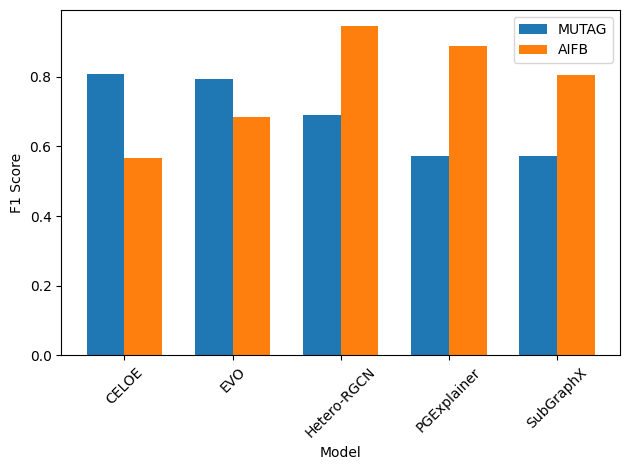

In [9]:
plot_comparison_bar_chart("eval_data_micro.csv", "Prediction Accuracy", "F1 Score")

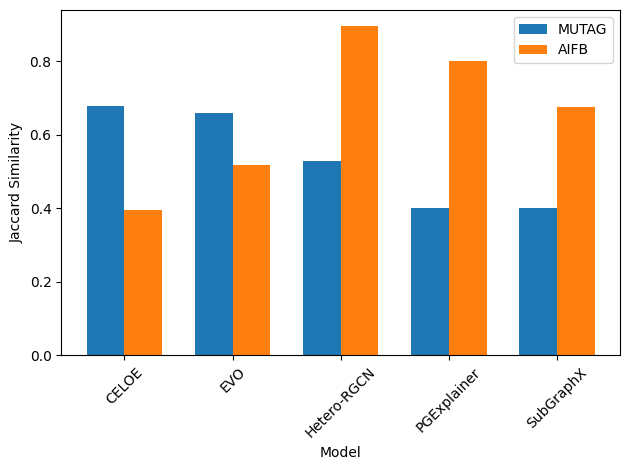

In [10]:
plot_comparison_bar_chart(
    "eval_data_micro.csv", "Prediction Accuracy", "Jaccard Similarity"
)

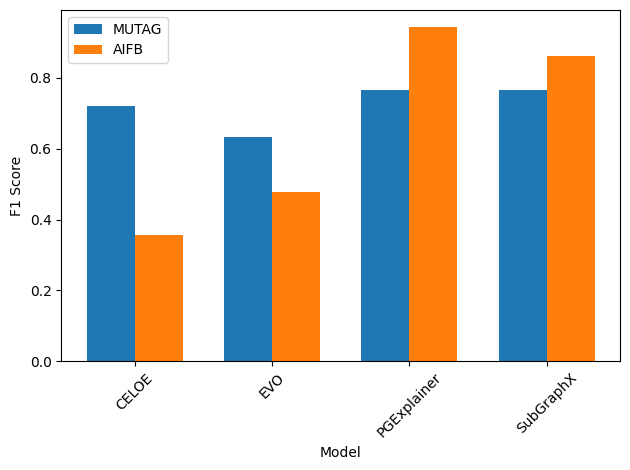

In [11]:
plot_comparison_bar_chart("eval_data_micro.csv", "Fidelity", "F1 Score")

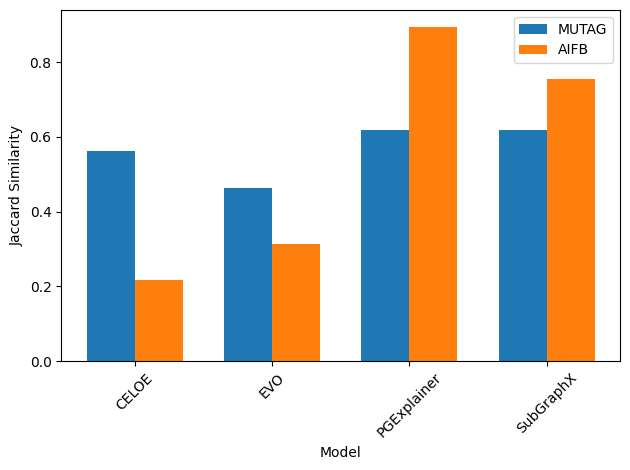

In [12]:
plot_comparison_bar_chart("eval_data_micro.csv", "Fidelity", "Jaccard Similarity")

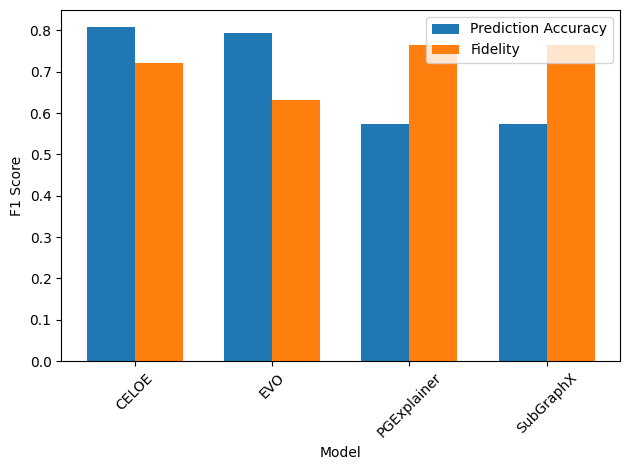

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("eval_data_micro.csv")
mutag_data = df[df["Dataset"] == "MUTAG"]
mutag_pa_data = mutag_data[mutag_data["Metric"].isin(["Prediction Accuracy"])]
mutag_pred = mutag_pa_data[["Model", "F1 Score"]]
mutag_fidelity_data = mutag_data[mutag_data["Metric"].isin(["Fidelity"])]
mutag_fid = mutag_fidelity_data[["Model", "F1 Score"]]
series1 = mutag_pred.set_index("Model")["F1 Score"]
series2 = mutag_fid.set_index("Model")["F1 Score"]
# Extract common elements
common_models = list(set(series1.index) & set(series2.index))

common_models.sort()

# Filter data for common elements after sorting
series1_common_sorted = series1[common_models]
series2_common_sorted = series2[common_models]

# Plotting
fig, ax = plt.subplots()
bar_width = 0.35
bar_positions = range(len(common_models))

ax.bar(bar_positions, series1_common_sorted, bar_width, label="Prediction Accuracy")
ax.bar(
    [pos + bar_width for pos in bar_positions],
    series2_common_sorted,
    bar_width,
    label="Fidelity",
)

ax.set_xticks([pos + bar_width / 2 for pos in bar_positions])
ax.set_xticklabels(common_models, rotation=45)
ax.set_ylabel("F1 Score")
ax.set_xlabel("Model")
ax.legend()
plt.savefig("eval_micro/mutag_pred_fid.png", dpi=300)
plt.tight_layout()

plt.show()

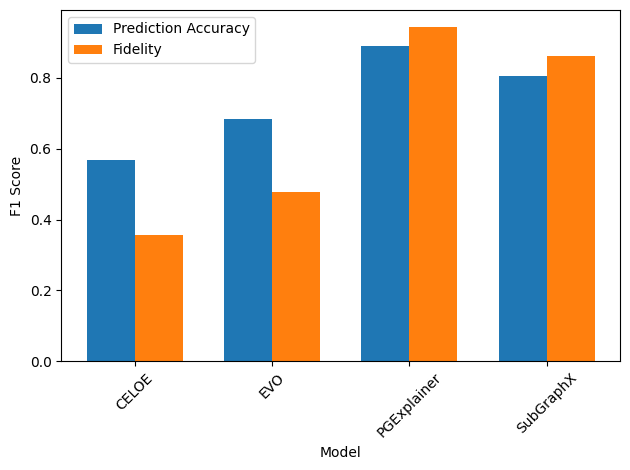

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("eval_data_micro.csv")
mutag_data = df[df["Dataset"] == "AIFB"]
mutag_pa_data = mutag_data[mutag_data["Metric"].isin(["Prediction Accuracy"])]
mutag_pred = mutag_pa_data[["Model", "F1 Score"]]
mutag_fidelity_data = mutag_data[mutag_data["Metric"].isin(["Fidelity"])]
mutag_fid = mutag_fidelity_data[["Model", "F1 Score"]]
series1 = mutag_pred.set_index("Model")["F1 Score"]
series2 = mutag_fid.set_index("Model")["F1 Score"]
# Extract common elements
common_models = list(set(series1.index) & set(series2.index))

common_models.sort()

# Filter data for common elements after sorting
series1_common_sorted = series1[common_models]
series2_common_sorted = series2[common_models]

# Plotting
fig, ax = plt.subplots()
bar_width = 0.35
bar_positions = range(len(common_models))

ax.bar(bar_positions, series1_common_sorted, bar_width, label="Prediction Accuracy")
ax.bar(
    [pos + bar_width for pos in bar_positions],
    series2_common_sorted,
    bar_width,
    label="Fidelity",
)

ax.set_xticks([pos + bar_width / 2 for pos in bar_positions])
ax.set_xticklabels(common_models, rotation=45)
ax.set_ylabel("F1 Score")
ax.set_xlabel("Model")
ax.legend()
plt.savefig("eval_micro/aifb_pred_fid.png", dpi=300)
plt.tight_layout()

plt.show()